In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import plotly.express as px
import plotly.offline as pyo

# Object

In [2]:

# df = pd.read_pickle("object/object4neg_complete_4_on_4_with_group.pkl")
# df = pd.read_pickle("object/object_1_2022-2016_output_with_postcode_range_2k_to_4k_random_new.pkl")
df = pd.read_pickle("object/object4neg_complete_1_on_1.pkl")

df = df.reset_index(drop=True)

df.head(8)
# df.iloc[16:24]

,target,lat,lng,date,zipcode,housenumber,past3hours,layers
0,0,52.044287,4.318281,2016-01-07 13:31:28,2283SM,224,773.0,"[[18.23154, 17.917362, 17.140352, 15.850747, 1..."
1,1,52.044014,4.318501,2016-01-07 13:31:28,2283SM,234,773.0,"[[19.411736, 19.212477, 19.001701, 18.773726, ..."
2,1,52.044014,4.318501,2016-01-07 13:34:00,2283SM,234,773.0,"[[19.411736, 19.212477, 19.001701, 18.773726, ..."
3,0,52.044034,4.318521,2016-01-07 13:34:00,2283SM,248,773.0,"[[18.241812, 18.00581, 17.803814, 17.619408, 1..."
4,0,52.051526,4.297411,2016-01-07 15:51:32,2533LR,176,968.0,"[[4.677323, 5.4871135, 4.3356543, 6.8456826, 6..."
5,1,52.051284,4.297697,2016-01-07 15:51:32,2533LR,196,968.0,"[[6.93177, 6.9996467, 7.060641, 7.12338, 7.179..."
6,0,52.051526,4.297411,2016-01-07 16:22:00,2533LR,174,1133.0,"[[4.677323, 5.4871135, 4.3356543, 6.8456826, 6..."
7,1,52.051284,4.297697,2016-01-07 16:22:00,2533LR,196,1133.0,"[[6.93177, 6.9996467, 7.060641, 7.12338, 7.179..."


In [3]:
def label_damage (row):
   if row['target'] == 1:
      return 'Rainwater damage'
   if row['target'] == 0:
      return 'No rainwater damage'

df.past3hours = df.past3hours / 10
df['label'] = df.apply (lambda row: label_damage(row), axis=1)

df.head(8)

,target,lat,lng,date,zipcode,housenumber,past3hours,layers,label
0,0,52.044287,4.318281,2016-01-07 13:31:28,2283SM,224,77.3,"[[18.23154, 17.917362, 17.140352, 15.850747, 1...",No rainwater damage
1,1,52.044014,4.318501,2016-01-07 13:31:28,2283SM,234,77.3,"[[19.411736, 19.212477, 19.001701, 18.773726, ...",Rainwater damage
2,1,52.044014,4.318501,2016-01-07 13:34:00,2283SM,234,77.3,"[[19.411736, 19.212477, 19.001701, 18.773726, ...",Rainwater damage
3,0,52.044034,4.318521,2016-01-07 13:34:00,2283SM,248,77.3,"[[18.241812, 18.00581, 17.803814, 17.619408, 1...",No rainwater damage
4,0,52.051526,4.297411,2016-01-07 15:51:32,2533LR,176,96.8,"[[4.677323, 5.4871135, 4.3356543, 6.8456826, 6...",No rainwater damage
5,1,52.051284,4.297697,2016-01-07 15:51:32,2533LR,196,96.8,"[[6.93177, 6.9996467, 7.060641, 7.12338, 7.179...",Rainwater damage
6,0,52.051526,4.297411,2016-01-07 16:22:00,2533LR,174,113.3,"[[4.677323, 5.4871135, 4.3356543, 6.8456826, 6...",No rainwater damage
7,1,52.051284,4.297697,2016-01-07 16:22:00,2533LR,196,113.3,"[[6.93177, 6.9996467, 7.060641, 7.12338, 7.179...",Rainwater damage


# Boxplot

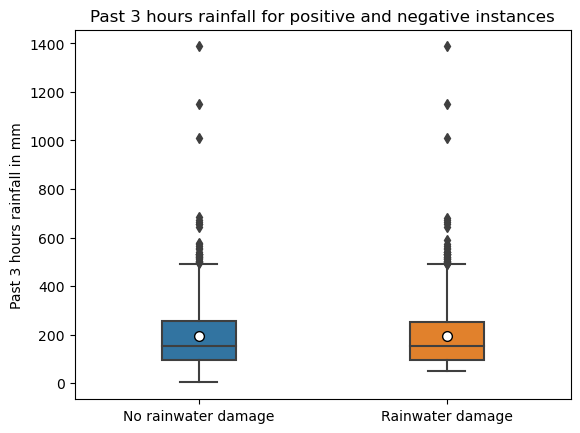

In [4]:
sns.boxplot( x=df["label"], y=df["past3hours"], width= 0.3, 
                meanprops={"marker":"o",
                "markerfacecolor":"white", 
                "markeredgecolor":"black",
                "markersize":"7"},
            showmeans=True)


#Set labels
plt.title('Past 3 hours rainfall for positive and negative instances')
plt.ylabel('Past 3 hours rainfall in mm')
plt.xlabel('')

current_path = os.getcwd()
plt.savefig(f'{current_path}/../results/plots/barplot_positive_negative_cases_object.png')

plt.show()


# Map visualization

In [11]:
color_scale = [(0, 'blue'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="lat", 
                        lon="lng", 
                        hover_name="group", 
                        hover_data=["target","date","past3hours", "zipcode", "housenumber", "distance"],
                        color="target",
                        color_continuous_scale=color_scale,
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [16]:
# Exporting the map

pyo.plot(fig, filename='object_addres.html', auto_open=False)

'object_addres.html'

# T-Test

In [9]:

import scipy.stats as stats

# Split data into positive and negative cases
positive_cases = df[df['target'] == 1]['past3hours']
negative_cases = df[df['target'] == 0]['past3hours']

# Perform a t-test on the mean rain values
t_stat, p_value = stats.ttest_ind(positive_cases, negative_cases)

# Print the results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.2f}")

T-statistic: 4.88
P-value: 0.00
